In [17]:
from qiskit.quantum_info import Statevector, Operator
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
import math
import matplotlib.pyplot as pl
import random

In [18]:
n = 8      #no. of qubits
N = 2**n   #dimension of matrix
t = 1      #no. of target states
length = list(range(n))
noi = math.floor(math.sqrt(N/t) * np.pi / 4)   #No of iterations
print("noi = ", noi)
alpha = 2*np.arctan(math.sqrt(t/(N-t)))
print("alpha = ", alpha)

#to set target states
target = np.zeros(t)
count = 0
flag = 0
i = 0
while(True):
    #to generate a random integer for target position
    a = random.randint(0,N-1)
    
    #checking if that number has already been chosen previously as target state
    for j in range(count):
        if(target[j] == a):
            flag = 1  #value is present in the target array
            
    #to store new value in target array
    if(flag == 0):
        #to store in count position of target array
        target[count] = a
        #updating count (position) value
        count += 1
        #checking for further iteration of i loop
        if(count == t):
            break
print("target = ",target)

phi = [a*np.pi/180 for a in range(15,181,15)]
print("phi = ",phi)

phi_m = [a*180/np.pi for a in phi]
print("phi_m = ",phi_m)

e_iphi = [complex(np.cos(a),np.sin(a)) for a in phi]
print("e_iphi = ",e_iphi)

theta    = [np.pi]
e_itheta = [complex(np.cos(a),np.sin(a)) for a in theta]
theta_m  = [a*180/np.pi for a in theta]
print("theta_m = ",theta_m)
print("e_itheta = ",e_itheta)

#array to store coherence values after each suboperation in every grover's iteration
data   = np.zeros((len(phi), noi * 4))   #to store coherence values
x_axis = list(range(noi * 4))            #to store iteration number
Cr_S   = np.zeros((len(phi),noi))
Cr_ni  = np.zeros(len(phi))
Cr_rho = np.zeros((len(phi),noi))

print("len(phi) = ",len(phi))

noi =  12
alpha =  0.1250815235929828
target =  [91.]
phi =  [0.2617993877991494, 0.5235987755982988, 0.7853981633974483, 1.0471975511965976, 1.3089969389957472, 1.5707963267948966, 1.8325957145940461, 2.0943951023931953, 2.356194490192345, 2.6179938779914944, 2.8797932657906435, 3.141592653589793]
phi_m =  [14.999999999999998, 29.999999999999996, 45.0, 59.99999999999999, 75.00000000000001, 90.0, 105.0, 119.99999999999999, 135.0, 150.00000000000003, 164.99999999999997, 180.0]
e_iphi =  [(0.9659258262890683+0.25881904510252074j), (0.8660254037844387+0.49999999999999994j), (0.7071067811865476+0.7071067811865476j), (0.5000000000000001+0.8660254037844386j), (0.25881904510252074+0.9659258262890683j), (6.123233995736766e-17+1j), (-0.25881904510252085+0.9659258262890683j), (-0.4999999999999998+0.8660254037844387j), (-0.7071067811865475+0.7071067811865476j), (-0.8660254037844387+0.49999999999999994j), (-0.9659258262890682+0.258819045102521j), (-1+1.2246467991473532e-16j)]
theta_m =  [180.0]
e_

In [19]:
def iteration(i,a):   #i is the iteration number of Grover's operator; a is the phi value
    print("In function: iteration(i=",i,",a=",a,")")
    copy_i = i    #to keep copy of the initial value of i 
    copy_a = a    #to keep copy of the initial value of a
    count = i*4
    
    qc.append(O_operator,length)    #adding O Operator to the circuit
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied O operator to |ψ2⟩", state.draw('latex'))
    density_operator = state.to_operator()
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ2⟩ = ",coherence)
    data[a][count] = coherence
    
    qc.h(length)    #adding H gates to the circuit
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied Hadamard to all |ψ1⟩", state.draw('latex'))
    density_operator = state.to_operator()
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ1⟩ = ",coherence)
    data[a][count+1] = coherence
    
    qc.append(P_operator,length)    #adding P operator to the circuit
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied P operator to |ψ4⟩", state.draw('latex'))
    density_operator = state.to_operator()
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ4⟩ = ",coherence)
    data[a][count+2] = coherence

    qc.h(length)    #adding H gates to the circuit
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied Hadamard to all |ψ5⟩", state.draw('latex'))
    density_operator = state.to_operator()
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ5⟩ = ",coherence)
    data[a][count+3] = coherence
    
    #to store the coherence value of the last iteration for a particular value of ϕ
    if(copy_i == (noi-1)):
        Cr_ni[copy_a] = coherence
        print("Cr_ni[",(copy_a+1),"] = ",Cr_ni[copy_a])
    else:
        print("copy_i != (noi-1) as copy_i = ",copy_i,", noi-1 = ",(noi-1))
    '''
    #to calculate coherence by the relative entropy formula
    j = copy_i+1
    print("j = ",j)
    alpha_r = alpha*(j+1/2)
    print("alpha_r = ",alpha_r)
    a = np.sin(alpha_r)
    print("a = ",a)
    b = np.cos(alpha_r)/math.sqrt(N-j)
    print("b = ",b)
    try:
        H_a = -((a**2 * math.log2(a**2)) + ((1 - a**2) * math.log2(1 - a**2)))
        value = H_a + math.log2(N - j) + (a**2) * (math.log2(j / (N - j)))
        Cr_S[copy_a][copy_i] = value
    except ValueError:
    # Handle the math domain error (e.g., log(0))
        Cr_S[copy_a][copy_i] = 0
    
    #creating rho_diag
    rho_diag = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if(i == j):
                rho_diag[i][j] = density_operator.data[i][j]
    print("rho_diag = ",rho_diag)
    S_rho_diag = 0
    for i in range(N):
        S_rho_diag -= rho_diag[i][i]
    print("S_rho_diag = ",S_rho_diag)
    #creatibg rho
    rho = [a for a in density_operator.data]
    print("rho =",rho)
    eigenvalues, eigenvectors = np.linalg.eig(density_operator.data)
    print("eigenvalues =",eigenvalues)
    S_rho      = 0
    for i in range(len(eigenvalues)):
        if(eigenvalues[i] > 0):
            S_rho -= eigenvalues[i]*math.log2(eigenvalues[i])
    print("S_rho =",S_rho)
    #creating coherence
    Cr_rho[copy_a][copy_i] = S_rho_diag - S_rho
    print("Cr_rho = ",Cr_rho)
    '''
for a in range(len(phi)):
    print("======================================== FOR ϕ = ", phi_m[a],"========================================")
    qc = QuantumCircuit(n)
    backend = Aer.get_backend('statevector_simulator')
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("initialised |ψ0⟩", state.draw('latex'))
    density_operator = state.to_operator()
    #print(density_operator.data)
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ0⟩ = ",coherence)

    qc.h(length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied Hadamard to all |ψ1⟩", state.draw('latex'))
    density_operator = state.to_operator()
    #print(density_operator.data)
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ1⟩ = ",coherence)

    #defining generalised O Operator
    count = 0
    O_operator = Operator(np.zeros((N,N)))
    for i in range(N):
        for j in range(N):
            if(i != j):   #off diagonal elements
                O_operator.data[i][j] = 0
            else:    #diagonal elements
                flag = 0
                for k in range(t):
                    if(i == target[k]):
                        O_operator.data[i][j] = e_iphi[a]
                        count += 1
                        flag = 1
                        break
                if(flag == 0):
                    O_operator.data[i][j] = 1            

    #defining generalised P Operator
    P_operator = Operator(np.zeros((N,N)))
    for i in range(N):
        for j in range(N):
            if(i != j):    #off-diagonal elements
                P_operator.data[i][j] = 0
            else:
                if(i==0 & j==0):   #for 1st element only
                    P_operator.data[i][j] = -1*e_itheta[0]
                else:
                    P_operator.data[i][j] = -1

    #sending out for x iterations of grover's operator
    for i in range(noi):
        print("--------",(i+1)," ITERATION OF GROVER'S ITERATION--------")
        print("Sending to function : iteration(i=",i,",a=",a,")")
        iteration(i,a)

======================================== FOR ϕ =  14.999999999999998 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 0 ,a= 0 )
In function: iteration(i= 0 ,a= 0 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.5873481547955602


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.5873481547955602


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.99572796457946
copy_i != (noi-1) as copy_i =  0 , noi-1 =  11
-------- 2  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 1 ,a= 0 )
In function: iteration(i= 1 ,a= 0 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.99572796457946


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.13922090677671808


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.13922090677671808


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.9957670663647
copy_i != (noi-1) as copy_i =  1 , noi-1 =  11
-------- 3  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 2 ,a= 0 )
In function: iteration(i= 2 ,a= 0 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.9957670663647


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.5437373236160097


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.5437373236160097


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.98675052638268
copy_i != (noi-1) as copy_i =  2 , noi-1 =  11
-------- 4  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 3 ,a= 0 )
In function: iteration(i= 3 ,a= 0 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.98675052638268


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.277243356865957


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.277243356865957


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.98770357398104
copy_i != (noi-1) as copy_i =  3 , noi-1 =  11
-------- 5  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 4 ,a= 0 )
In function: iteration(i= 4 ,a= 0 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.98770357398104


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.4611550832835635


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.4611550832835635


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.98074837011916
copy_i != (noi-1) as copy_i =  4 , noi-1 =  11
-------- 6  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 5 ,a= 0 )
In function: iteration(i= 5 ,a= 0 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.98074837011916


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.4023724446712923


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.40237244467129224


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.98516530234173
copy_i != (noi-1) as copy_i =  5 , noi-1 =  11
-------- 7  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 6 ,a= 0 )
In function: iteration(i= 6 ,a= 0 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.98516530234173


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.3481183858942158


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.3481183858942158


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.98265115797366
copy_i != (noi-1) as copy_i =  6 , noi-1 =  11
-------- 8  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 7 ,a= 0 )
In function: iteration(i= 7 ,a= 0 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.98265115797366


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.502881748132537


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.502881748132537


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.99121722451216
copy_i != (noi-1) as copy_i =  7 , noi-1 =  11
-------- 9  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 8 ,a= 0 )
In function: iteration(i= 8 ,a= 0 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.99121722451216


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.21566707458002432


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.21566707458002432


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.9909107285993
copy_i != (noi-1) as copy_i =  8 , noi-1 =  11
-------- 10  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 9 ,a= 0 )
In function: iteration(i= 9 ,a= 0 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.9909107285993


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.568678332996339


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.5686783329963389


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.99864200120717
copy_i != (noi-1) as copy_i =  9 , noi-1 =  11
-------- 11  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 10 ,a= 0 )
In function: iteration(i= 10 ,a= 0 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.99864200120717


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.07571280049893889


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.07571280049893889


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.99863995634095
copy_i != (noi-1) as copy_i =  10 , noi-1 =  11
-------- 12  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 11 ,a= 0 )
In function: iteration(i= 11 ,a= 0 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.99863995634095


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.5928617970227138


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.5928617970227138


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.99906338140607
Cr_ni[ 1 ] =  254.99906338140607
======================================== FOR ϕ =  29.999999999999996 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 0 ,a= 1 )
In function: iteration(i= 0 ,a= 1 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.2955117575334545


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.2955117575334545


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.94366113523938
copy_i != (noi-1) as copy_i =  0 , noi-1 =  11
-------- 2  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 1 ,a= 1 )
In function: iteration(i= 1 ,a= 1 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.94366113523938


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.5994150577812248


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.5994150577812248


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.95192335485103
copy_i != (noi-1) as copy_i =  1 , noi-1 =  11
-------- 3  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 2 ,a= 1 )
In function: iteration(i= 2 ,a= 1 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.95192335485103


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.9025370851066471


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.9025370851066471


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.91253783945254
copy_i != (noi-1) as copy_i =  2 , noi-1 =  11
-------- 4  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 3 ,a= 1 )
In function: iteration(i= 3 ,a= 1 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.91253783945254


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.1297516766650244


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.1297516766650244


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.98106691926125
copy_i != (noi-1) as copy_i =  3 , noi-1 =  11
-------- 5  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 4 ,a= 1 )
In function: iteration(i= 4 ,a= 1 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.98106691926125


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.30742319104897564


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.30742319104897564


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.98064846333628
copy_i != (noi-1) as copy_i =  4 , noi-1 =  11
-------- 6  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 5 ,a= 1 )
In function: iteration(i= 5 ,a= 1 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.98064846333628


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.349803287981584


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.349803287981584


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.98380611028864
copy_i != (noi-1) as copy_i =  5 , noi-1 =  11
-------- 7  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 6 ,a= 1 )
In function: iteration(i= 6 ,a= 1 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.98380611028864


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.2779954219124565


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.2779954219124565


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.98406788987572
copy_i != (noi-1) as copy_i =  6 , noi-1 =  11
-------- 8  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 7 ,a= 1 )
In function: iteration(i= 7 ,a= 1 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.98406788987572


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.1491707550944739


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.1491707550944736


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.9142392155637
copy_i != (noi-1) as copy_i =  7 , noi-1 =  11
-------- 9  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 8 ,a= 1 )
In function: iteration(i= 8 ,a= 1 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.9142392155637


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.8763683948908056


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.8763683948908056


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.94999304052965
copy_i != (noi-1) as copy_i =  8 , noi-1 =  11
-------- 10  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 9 ,a= 1 )
In function: iteration(i= 9 ,a= 1 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.94999304052965


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.6287218093538091


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.6287218093538091


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.93991093463828
copy_i != (noi-1) as copy_i =  9 , noi-1 =  11
-------- 11  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 10 ,a= 1 )
In function: iteration(i= 10 ,a= 1 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.93991093463828


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.2846295026252772


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.2846295026252772


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.99981994032956
copy_i != (noi-1) as copy_i =  10 , noi-1 =  11
-------- 12  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 11 ,a= 1 )
In function: iteration(i= 11 ,a= 1 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.99981994032956


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.02697209349465859


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.02697209349465859


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.99981993774742
Cr_ni[ 2 ] =  254.99981993774742
======================================== FOR ϕ =  45.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 0 ,a= 2 )
In function: iteration(i= 0 ,a= 2 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.101955260604015


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.101955260604015


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.77879551288817
copy_i != (noi-1) as copy_i =  0 , noi-1 =  11
-------- 2  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 1 ,a= 2 )
In function: iteration(i= 1 ,a= 2 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.77879551288817


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.4909747510480966


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.4909747510480966


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.91799051856205
copy_i != (noi-1) as copy_i =  1 , noi-1 =  11
-------- 3  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 2 ,a= 2 )
In function: iteration(i= 2 ,a= 2 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.91799051856205


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.7490946313159581


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.749094631315958


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.90775421574858
copy_i != (noi-1) as copy_i =  2 , noi-1 =  11
-------- 4  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 3 ,a= 2 )
In function: iteration(i= 3 ,a= 2 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.90775421574858


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.3221998387162874


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.3221998387162874


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.91751424832276
copy_i != (noi-1) as copy_i =  3 , noi-1 =  11
-------- 5  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 4 ,a= 2 )
In function: iteration(i= 4 ,a= 2 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.91751424832276


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.6973781488253794


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.6973781488253794


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.9250153342522
copy_i != (noi-1) as copy_i =  4 , noi-1 =  11
-------- 6  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 5 ,a= 2 )
In function: iteration(i= 5 ,a= 2 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.9250153342522


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.53836626895953


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.5383662689595303


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.77332644140077
copy_i != (noi-1) as copy_i =  5 , noi-1 =  11
-------- 7  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 6 ,a= 2 )
In function: iteration(i= 6 ,a= 2 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.77332644140077


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.0727017920174737


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.0727017920174737


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.99954408248766
copy_i != (noi-1) as copy_i =  6 , noi-1 =  11
-------- 8  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 7 ,a= 2 )
In function: iteration(i= 7 ,a= 2 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.99954408248766


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.04308812024953185


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.04308812024953185


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.99954406938264
copy_i != (noi-1) as copy_i =  7 , noi-1 =  11
-------- 9  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 8 ,a= 2 )
In function: iteration(i= 8 ,a= 2 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.99954406938264


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.1295462728776964


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.1295462728776964


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.7849175500215
copy_i != (noi-1) as copy_i =  8 , noi-1 =  11
-------- 10  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 9 ,a= 2 )
In function: iteration(i= 9 ,a= 2 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.7849175500215


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.4428183949359574


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.4428183949359574


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.9114606432471
copy_i != (noi-1) as copy_i =  9 , noi-1 =  11
-------- 11  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 10 ,a= 2 )
In function: iteration(i= 10 ,a= 2 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.9114606432471


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.8010040792576961


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.8010040792576961


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.8978139402594
copy_i != (noi-1) as copy_i =  10 , noi-1 =  11
-------- 12  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 11 ,a= 2 )
In function: iteration(i= 11 ,a= 2 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.8978139402594


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.320196225908737


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.320196225908737


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.92702506141976
Cr_ni[ 3 ] =  254.92702506141976
======================================== FOR ϕ =  59.99999999999999 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 0 ,a= 3 )
In function: iteration(i= 0 ,a= 3 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.976619698030718


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.976619698030718


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.4703841298697
copy_i != (noi-1) as copy_i =  0 , noi-1 =  11
-------- 2  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 1 ,a= 3 )
In function: iteration(i= 1 ,a= 3 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.4703841298697


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.945763960008774


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.945763960008774


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.9997587537605
copy_i != (noi-1) as copy_i =  1 , noi-1 =  11
-------- 3  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 2 ,a= 3 )
In function: iteration(i= 2 ,a= 3 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.9997587537605


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.03124572727905064


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.03124572727905064


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.9997587523555
copy_i != (noi-1) as copy_i =  2 , noi-1 =  11
-------- 4  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 3 ,a= 3 )
In function: iteration(i= 3 ,a= 3 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.9997587523555


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  3.0068692097860983


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  3.0068692097860983


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.47079312688456
copy_i != (noi-1) as copy_i =  3 , noi-1 =  11
-------- 5  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 4 ,a= 3 )
In function: iteration(i= 4 ,a= 3 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.47079312688456


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.914315970079619


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.9143159700796186


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.99903573689608
copy_i != (noi-1) as copy_i =  4 , noi-1 =  11
-------- 6  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 5 ,a= 3 )
In function: iteration(i= 5 ,a= 3 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.99903573689608


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.06296434074825728


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.06296434074825728


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.9990356936033
copy_i != (noi-1) as copy_i =  5 , noi-1 =  11
-------- 7  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 6 ,a= 3 )
In function: iteration(i= 6 ,a= 3 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.9990356936033


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  3.0364987647811295


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  3.03649876478113


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.47161054760358
copy_i != (noi-1) as copy_i =  6 , noi-1 =  11
-------- 8  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 7 ,a= 3 )
In function: iteration(i= 7 ,a= 3 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.47161054760358


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.8822899379364055


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.8822899379364055


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.99783316033378
copy_i != (noi-1) as copy_i =  7 , noi-1 =  11
-------- 9  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 8 ,a= 3 )
In function: iteration(i= 8 ,a= 3 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.99783316033378


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.09514956679740844


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.09514956679740844


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.9978328314176
copy_i != (noi-1) as copy_i =  8 , noi-1 =  11
-------- 10  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 9 ,a= 3 )
In function: iteration(i= 9 ,a= 3 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.9978328314176


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  3.065494884835706


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  3.065494884835706


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.47283523944358
copy_i != (noi-1) as copy_i =  9 , noi-1 =  11
-------- 11  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 10 ,a= 3 )
In function: iteration(i= 10 ,a= 3 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.47283523944358


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.849700299840049


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.849700299840049


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.9961548102188
copy_i != (noi-1) as copy_i =  10 , noi-1 =  11
-------- 12  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 11 ,a= 3 )
In function: iteration(i= 11 ,a= 3 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.9961548102188


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.12779478495356839


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.12779478495356839


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.9961534236391
Cr_ni[ 4 ] =  254.9961534236391
======================================== FOR ϕ =  75.00000000000001 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 0 ,a= 4 )
In function: iteration(i= 0 ,a= 4 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  3.8835643558248494


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  3.8835643558248494


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.0272702169975
copy_i != (noi-1) as copy_i =  0 , noi-1 =  11
-------- 2  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 1 ,a= 4 )
In function: iteration(i= 1 ,a= 4 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.0272702169975


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  5.055626885614646


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  5.055626885614646


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.71571565734234
copy_i != (noi-1) as copy_i =  1 , noi-1 =  11
-------- 3  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 2 ,a= 4 )
In function: iteration(i= 2 ,a= 4 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.71571565734234


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.4223926452064917


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.422392645206492


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.7709152130893
copy_i != (noi-1) as copy_i =  2 , noi-1 =  11
-------- 4  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 3 ,a= 4 )
In function: iteration(i= 3 ,a= 4 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.7709152130893


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.207421591130358


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.2074215911303576


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.46989760444555
copy_i != (noi-1) as copy_i =  3 , noi-1 =  11
-------- 5  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 4 ,a= 4 )
In function: iteration(i= 4 ,a= 4 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.46989760444555


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  5.297311288712972


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  5.297311288712972


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.19427916252178
copy_i != (noi-1) as copy_i =  4 , noi-1 =  11
-------- 6  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 5 ,a= 4 )
In function: iteration(i= 5 ,a= 4 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.19427916252178


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  3.1395903789553463


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  3.1395903789553463


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.93400617031833
copy_i != (noi-1) as copy_i =  5 , noi-1 =  11
-------- 7  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 6 ,a= 4 )
In function: iteration(i= 6 ,a= 4 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.93400617031833


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.591281382420217


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.591281382420217


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.93290117817594
copy_i != (noi-1) as copy_i =  6 , noi-1 =  11
-------- 8  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 7 ,a= 4 )
In function: iteration(i= 7 ,a= 4 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.93290117817594


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  4.518375220590374


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  4.518375220590374


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.96080724806535
copy_i != (noi-1) as copy_i =  7 , noi-1 =  11
-------- 9  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 8 ,a= 4 )
In function: iteration(i= 8 ,a= 4 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.96080724806535


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  4.611221887715283


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  4.611221887715284


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.90931293098384
copy_i != (noi-1) as copy_i =  8 , noi-1 =  11
-------- 10  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 9 ,a= 4 )
In function: iteration(i= 9 ,a= 4 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.90931293098384


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.7032819273085315


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.7032819273085315


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.91174809094275
copy_i != (noi-1) as copy_i =  9 , noi-1 =  11
-------- 11  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 10 ,a= 4 )
In function: iteration(i= 10 ,a= 4 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.91174809094275


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  3.0069706558357985


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  3.0069706558357985


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.23027708611014
copy_i != (noi-1) as copy_i =  10 , noi-1 =  11
-------- 12  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 11 ,a= 4 )
In function: iteration(i= 11 ,a= 4 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.23027708611014


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  5.31646479026083


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  5.31646479026083


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.42736999054316
Cr_ni[ 5 ] =  254.42736999054316
======================================== FOR ϕ =  90.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 0 ,a= 5 )
In function: iteration(i= 0 ,a= 5 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  4.78301831046673


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  4.78301831046673


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.48473844030875
copy_i != (noi-1) as copy_i =  0 , noi-1 =  11
-------- 2  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 1 ,a= 5 )
In function: iteration(i= 1 ,a= 5 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.48473844030875


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.814563751310744


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  7.814563751310744


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.552907329959
copy_i != (noi-1) as copy_i =  1 , noi-1 =  11
-------- 3  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 2 ,a= 5 )
In function: iteration(i= 2 ,a= 5 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.552907329959


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  4.575173306988811


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  4.575173306988811


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.99620329664225
copy_i != (noi-1) as copy_i =  2 , noi-1 =  11
-------- 4  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 3 ,a= 5 )
In function: iteration(i= 3 ,a= 5 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.99620329664225


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.12682635663687378


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.12682635663687378


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.99620285062142
copy_i != (noi-1) as copy_i =  3 , noi-1 =  11
-------- 5  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 4 ,a= 5 )
In function: iteration(i= 4 ,a= 5 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.99620285062142


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  4.98798585837104


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  4.98798585837104


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.42023648893073
copy_i != (noi-1) as copy_i =  4 , noi-1 =  11
-------- 6  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 5 ,a= 5 )
In function: iteration(i= 5 ,a= 5 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.42023648893073


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.80328368409216


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  7.80328368409216


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.62432028727807
copy_i != (noi-1) as copy_i =  5 , noi-1 =  11
-------- 7  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 6 ,a= 5 )
In function: iteration(i= 6 ,a= 5 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.62432028727807


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  4.365000483662469


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  4.365000483662469


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.98487842986967
copy_i != (noi-1) as copy_i =  6 , noi-1 =  11
-------- 8  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 7 ,a= 5 )
In function: iteration(i= 7 ,a= 5 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.98487842986967


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.26105514277368136


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.26105514277368136


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.98486405452698
copy_i != (noi-1) as copy_i =  7 , noi-1 =  11
-------- 9  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 8 ,a= 5 )
In function: iteration(i= 8 ,a= 5 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.98486405452698


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  5.189529801901855


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  5.189529801901856


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.3597988007098
copy_i != (noi-1) as copy_i =  8 , noi-1 =  11
-------- 10  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 9 ,a= 5 )
In function: iteration(i= 9 ,a= 5 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.3597988007098


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.780755867088023


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  7.780755867088023


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.6985308467343
copy_i != (noi-1) as copy_i =  9 , noi-1 =  11
-------- 11  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 10 ,a= 5 )
In function: iteration(i= 10 ,a= 5 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.6985308467343


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  4.153051099145632


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  4.153051099145632


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.9662407801397
copy_i != (noi-1) as copy_i =  10 , noi-1 =  11
-------- 12  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 11 ,a= 5 )
In function: iteration(i= 11 ,a= 5 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.9662407801397


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.4025180429922904


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.4025180429922904


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.96613023544015
Cr_ni[ 6 ] =  254.96613023544015
======================================== FOR ϕ =  105.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 0 ,a= 6 )
In function: iteration(i= 0 ,a= 6 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  5.633707629017123


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  5.633707629017123


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.89275721835926
copy_i != (noi-1) as copy_i =  0 , noi-1 =  11
-------- 2  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 1 ,a= 6 )
In function: iteration(i= 1 ,a= 6 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.89275721835926


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  11.082556244759786


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  11.082556244759786


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  251.383441040582
copy_i != (noi-1) as copy_i =  1 , noi-1 =  11
-------- 3  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 2 ,a= 6 )
In function: iteration(i= 2 ,a= 6 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  251.383441040582


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  10.061906889418964


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  10.061906889418964


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.72133043561524
copy_i != (noi-1) as copy_i =  2 , noi-1 =  11
-------- 4  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 3 ,a= 6 )
In function: iteration(i= 3 ,a= 6 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.72133043561524


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  3.7860793437979914


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  3.786079343797991


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.79768182564027
copy_i != (noi-1) as copy_i =  3 , noi-1 =  11
-------- 5  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 4 ,a= 6 )
In function: iteration(i= 4 ,a= 6 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.79768182564027


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.1376844973256597


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.1376844973256597


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.78994465021609
copy_i != (noi-1) as copy_i =  4 , noi-1 =  11
-------- 6  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 5 ,a= 6 )
In function: iteration(i= 5 ,a= 6 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.78994465021609


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.4760821043742745


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  7.4760821043742745


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.12983792895156
copy_i != (noi-1) as copy_i =  5 , noi-1 =  11
-------- 7  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 6 ,a= 6 )
In function: iteration(i= 6 ,a= 6 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.12983792895156


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  11.567598925240054


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  11.567598925240054


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  251.73387822113474
copy_i != (noi-1) as copy_i =  6 , noi-1 =  11
-------- 8  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 7 ,a= 6 )
In function: iteration(i= 7 ,a= 6 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  251.73387822113474


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  8.608184015663689


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  8.608184015663689


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.44701026675293
copy_i != (noi-1) as copy_i =  7 , noi-1 =  11
-------- 9  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 8 ,a= 6 )
In function: iteration(i= 8 ,a= 6 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.44701026675293


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.0984543791875727


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.0984543791875727


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.57864182518844
copy_i != (noi-1) as copy_i =  8 , noi-1 =  11
-------- 10  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 9 ,a= 6 )
In function: iteration(i= 9 ,a= 6 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.57864182518844


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.641186554373987


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.641186554373987


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.2240200618095
copy_i != (noi-1) as copy_i =  9 , noi-1 =  11
-------- 11  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 10 ,a= 6 )
In function: iteration(i= 10 ,a= 6 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.2240200618095


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  9.139310468640986


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  9.139310468640986


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  251.57906745868036
copy_i != (noi-1) as copy_i =  10 , noi-1 =  11
-------- 12  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 11 ,a= 6 )
In function: iteration(i= 11 ,a= 6 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  251.57906745868036


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  11.467937987130025


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  11.467937987130025


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.37033320484102
Cr_ni[ 7 ] =  252.37033320484102
======================================== FOR ϕ =  119.99999999999999 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 0 ,a= 7 )
In function: iteration(i= 0 ,a= 7 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  6.395306948164086


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  6.395306948164086


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.30729643001135
copy_i != (noi-1) as copy_i =  0 , noi-1 =  11
-------- 2  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 1 ,a= 7 )
In function: iteration(i= 1 ,a= 7 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.30729643001135


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  14.583128782564936


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  14.583128782564936


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  248.41983147726836
copy_i != (noi-1) as copy_i =  1 , noi-1 =  11
-------- 3  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 2 ,a= 7 )
In function: iteration(i= 2 ,a= 7 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  248.41983147726836


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  17.900677240184987


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  17.900677240184987


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  248.81392253712968
copy_i != (noi-1) as copy_i =  2 , noi-1 =  11
-------- 4  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 3 ,a= 7 )
In function: iteration(i= 3 ,a= 7 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  248.81392253712968


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  13.521490356403774


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  13.521490356403774


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.95417149213642
copy_i != (noi-1) as copy_i =  3 , noi-1 =  11
-------- 5  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 4 ,a= 7 )
In function: iteration(i= 4 ,a= 7 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.95417149213642


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  5.165431000582059


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  5.165431000582059


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.92720675551723
copy_i != (noi-1) as copy_i =  4 , noi-1 =  11
-------- 6  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 5 ,a= 7 )
In function: iteration(i= 5 ,a= 7 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.92720675551723


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.6135847310090112


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.6135847310090112


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.92694564068614
copy_i != (noi-1) as copy_i =  5 , noi-1 =  11
-------- 7  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 6 ,a= 7 )
In function: iteration(i= 6 ,a= 7 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.92694564068614


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.670585028785484


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  7.670585028785484


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  251.63284476926196
copy_i != (noi-1) as copy_i =  6 , noi-1 =  11
-------- 8  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 7 ,a= 7 )
In function: iteration(i= 7 ,a= 7 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  251.63284476926196


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  15.527915097505746


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  15.527915097505746


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  248.134423162082
copy_i != (noi-1) as copy_i =  7 , noi-1 =  11
-------- 9  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 8 ,a= 7 )
In function: iteration(i= 8 ,a= 7 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  248.134423162082


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  17.715012361030908


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  17.715012361030908


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  249.30340433559056
copy_i != (noi-1) as copy_i =  8 , noi-1 =  11
-------- 10  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 9 ,a= 7 )
In function: iteration(i= 9 ,a= 7 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  249.30340433559056


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  12.364755802733532


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  12.364755802733532


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.5489154236402
copy_i != (noi-1) as copy_i =  9 , noi-1 =  11
-------- 11  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 10 ,a= 7 )
In function: iteration(i= 10 ,a= 7 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.5489154236402


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  4.003592716260028


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  4.003592716260028


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.72335275536142
copy_i != (noi-1) as copy_i =  10 , noi-1 =  11
-------- 12  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 11 ,a= 7 )
In function: iteration(i= 11 ,a= 7 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.72335275536142


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.3670278095745556


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.3670278095745556


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.71290540705715
Cr_ni[ 8 ] =  254.71290540705715
======================================== FOR ϕ =  135.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 0 ,a= 8 )
In function: iteration(i= 0 ,a= 8 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.030857210944315


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  7.030857210944315


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  251.78356725872945
copy_i != (noi-1) as copy_i =  0 , noi-1 =  11
-------- 2  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 1 ,a= 8 )
In function: iteration(i= 1 ,a= 8 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  251.78356725872945


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  17.93752885336017


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  17.93752885336017


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  245.13608391815492
copy_i != (noi-1) as copy_i =  1 , noi-1 =  11
-------- 3  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 2 ,a= 8 )
In function: iteration(i= 2 ,a= 8 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  245.13608391815492


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  27.173957719639866


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  27.173957719639866


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  240.56645506881443
copy_i != (noi-1) as copy_i =  2 , noi-1 =  11
-------- 4  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 3 ,a= 8 )
In function: iteration(i= 3 ,a= 8 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  240.56645506881443


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  29.807318934858564


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  29.807318934858564


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  241.66085871967005
copy_i != (noi-1) as copy_i =  3 , noi-1 =  11
-------- 5  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 4 ,a= 8 )
In function: iteration(i= 4 ,a= 8 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  241.66085871967005


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  24.41295348785605


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  24.41295348785605


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  247.56830322947476
copy_i != (noi-1) as copy_i =  4 , noi-1 =  11
-------- 6  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 5 ,a= 8 )
In function: iteration(i= 5 ,a= 8 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  247.56830322947476


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  13.902076892688454


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  13.902076892688454


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.59691527606552
copy_i != (noi-1) as copy_i =  5 , noi-1 =  11
-------- 7  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 6 ,a= 8 )
In function: iteration(i= 6 ,a= 8 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.59691527606552


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  3.826100659871467


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  3.826100659871467


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.56664571700682
copy_i != (noi-1) as copy_i =  6 , noi-1 =  11
-------- 8  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 7 ,a= 8 )
In function: iteration(i= 7 ,a= 8 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.56664571700682


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.8103415181325606


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.8103415181325606


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.54494111384687
copy_i != (noi-1) as copy_i =  7 , noi-1 =  11
-------- 9  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 8 ,a= 8 )
In function: iteration(i= 8 ,a= 8 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.54494111384687


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  10.762374591087186


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  10.762374591087188


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  249.50751016337978
copy_i != (noi-1) as copy_i =  8 , noi-1 =  11
-------- 10  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 9 ,a= 8 )
In function: iteration(i= 9 ,a= 8 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  249.50751016337978


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  21.751397728524392


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  21.751397728524392


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  242.9915287758378
copy_i != (noi-1) as copy_i =  9 , noi-1 =  11
-------- 11  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 10 ,a= 8 )
In function: iteration(i= 10 ,a= 8 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  242.9915287758378


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  29.04830075507189


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  29.04830075507189


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  240.24785480217597
copy_i != (noi-1) as copy_i =  10 , noi-1 =  11
-------- 12  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 11 ,a= 8 )
In function: iteration(i= 11 ,a= 8 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  240.24785480217597


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  28.728711860931938


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  28.728711860931938


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  243.41520435852388
Cr_ni[ 9 ] =  243.41520435852388
======================================== FOR ϕ =  150.00000000000003 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 0 ,a= 9 )
In function: iteration(i= 0 ,a= 9 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.508994693026535


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  7.508994693026535


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  251.37052090150436
copy_i != (noi-1) as copy_i =  0 , noi-1 =  11
-------- 2  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 1 ,a= 9 )
In function: iteration(i= 1 ,a= 9 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  251.37052090150436


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  20.72854369509835


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  20.72854369509835


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  242.14808778138413
copy_i != (noi-1) as copy_i =  1 , noi-1 =  11
-------- 3  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 2 ,a= 9 )
In function: iteration(i= 2 ,a= 9 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  242.14808778138413


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  36.1147638247827


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  36.1147638247827


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  231.08736981814212
copy_i != (noi-1) as copy_i =  2 , noi-1 =  11
-------- 4  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 3 ,a= 9 )
In function: iteration(i= 3 ,a= 9 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  231.08736981814212


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  49.360737541359306


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  49.360737541359306


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  222.45884677895026
copy_i != (noi-1) as copy_i =  3 , noi-1 =  11
-------- 5  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 4 ,a= 9 )
In function: iteration(i= 4 ,a= 9 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  222.45884677895026


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  56.716893177228116


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  56.716893177228116


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  219.54255573040822
copy_i != (noi-1) as copy_i =  4 , noi-1 =  11
-------- 6  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 5 ,a= 9 )
In function: iteration(i= 5 ,a= 9 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  219.54255573040822


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  56.09896162514512


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  56.09896162514512


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  223.4429687745218
copy_i != (noi-1) as copy_i =  5 , noi-1 =  11
-------- 7  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 6 ,a= 9 )
In function: iteration(i= 6 ,a= 9 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  223.4429687745218


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  47.68193240106232


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  47.68193240106232


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  232.68257852682265
copy_i != (noi-1) as copy_i =  6 , noi-1 =  11
-------- 8  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 7 ,a= 9 )
In function: iteration(i= 7 ,a= 9 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  232.68257852682265


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  33.8508886931323


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  33.8508886931323


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  243.74469305462557
copy_i != (noi-1) as copy_i =  7 , noi-1 =  11
-------- 9  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 8 ,a= 9 )
In function: iteration(i= 8 ,a= 9 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  243.74469305462557


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  18.518231382228315


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  18.51823138222831


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.3392422919429
copy_i != (noi-1) as copy_i =  8 , noi-1 =  11
-------- 10  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 9 ,a= 9 )
In function: iteration(i= 9 ,a= 9 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.3392422919429


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  5.960772406080611


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  5.960772406080612


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.9151800973995
copy_i != (noi-1) as copy_i =  9 , noi-1 =  11
-------- 11  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 10 ,a= 9 )
In function: iteration(i= 10 ,a= 9 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.9151800973995


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.6662092515752093


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.6662092515752093


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.915097680705
copy_i != (noi-1) as copy_i =  10 , noi-1 =  11
-------- 12  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 11 ,a= 9 )
In function: iteration(i= 11 ,a= 9 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.915097680705


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  9.187817225567539


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  9.187817225567539


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  250.27386162794457
Cr_ni[ 10 ] =  250.27386162794457
======================================== FOR ϕ =  164.99999999999997 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 0 ,a= 10 )
In function: iteration(i= 0 ,a= 10 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.805849576914723


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  7.8058495769147225


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  251.10643309444248
copy_i != (noi-1) as copy_i =  0 , noi-1 =  11
-------- 2  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 1 ,a= 10 )
In function: iteration(i= 1 ,a= 10 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  251.10643309444248


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  22.57913602241361


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  22.57913602241361


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  240.0599764324788
copy_i != (noi-1) as copy_i =  1 , noi-1 =  11
-------- 3  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 2 ,a= 10 )
In function: iteration(i= 2 ,a= 10 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  240.0599764324788


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  42.623396500942505


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  42.623396500942505


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  223.50921227050281
copy_i != (noi-1) as copy_i =  2 , noi-1 =  11
-------- 4  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 3 ,a= 10 )
In function: iteration(i= 3 ,a= 10 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  223.50921227050281


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  65.57837697817169


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  65.57837697817169


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  203.8388759093415
copy_i != (noi-1) as copy_i =  3 , noi-1 =  11
-------- 5  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 4 ,a= 10 )
In function: iteration(i= 4 ,a= 10 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  203.8388759093415


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  88.73270443987612


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  88.73270443987612


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  183.8654360556114
copy_i != (noi-1) as copy_i =  4 , noi-1 =  11
-------- 6  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 5 ,a= 10 )
In function: iteration(i= 5 ,a= 10 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  183.8654360556114


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  109.37634952100792


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  109.37634952100792


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  166.46896189009198
copy_i != (noi-1) as copy_i =  5 , noi-1 =  11
-------- 7  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 6 ,a= 10 )
In function: iteration(i= 6 ,a= 10 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  166.46896189009198


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  125.13849076817046


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  125.13849076817046


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  154.19622782671092
copy_i != (noi-1) as copy_i =  6 , noi-1 =  11
-------- 8  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 7 ,a= 10 )
In function: iteration(i= 7 ,a= 10 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  154.19622782671092


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  134.25547243881115


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  134.25547243881115


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  148.87690885043594
copy_i != (noi-1) as copy_i =  7 , noi-1 =  11
-------- 9  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 8 ,a= 10 )
In function: iteration(i= 8 ,a= 10 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  148.87690885043594


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  135.73324593714298


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  135.73324593714298


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  151.3151175036302
copy_i != (noi-1) as copy_i =  8 , noi-1 =  11
-------- 10  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 9 ,a= 10 )
In function: iteration(i= 9 ,a= 10 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  151.3151175036302


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  129.41289294704765


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  129.41289294704765


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  161.14134230424105
copy_i != (noi-1) as copy_i =  9 , noi-1 =  11
-------- 11  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 10 ,a= 10 )
In function: iteration(i= 10 ,a= 10 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  161.14134230424105


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  115.97856011402315


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  115.97856011402315


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  176.88159216975737
copy_i != (noi-1) as copy_i =  10 , noi-1 =  11
-------- 12  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 11 ,a= 10 )
In function: iteration(i= 11 ,a= 10 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  176.88159216975737


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  96.91799625840544


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  96.91799625840547


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  196.2157737001625
Cr_ni[ 11 ] =  196.2157737001625
======================================== FOR ϕ =  180.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 0 ,a= 11 )
In function: iteration(i= 0 ,a= 11 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.906494140625


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  7.906494140625


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  251.01562500000003
copy_i != (noi-1) as copy_i =  0 , noi-1 =  11
-------- 2  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 1 ,a= 11 )
In function: iteration(i= 1 ,a= 11 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  251.01562500000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  23.227256834506992


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  23.227256834506992


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  239.3105506896973
copy_i != (noi-1) as copy_i =  1 , noi-1 =  11
-------- 3  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 2 ,a= 11 )
In function: iteration(i= 2 ,a= 11 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  239.3105506896973


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  45.008480833857924


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  45.008480833857924


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  220.61348652932796
copy_i != (noi-1) as copy_i =  2 , noi-1 =  11
-------- 4  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 3 ,a= 11 )
In function: iteration(i= 3 ,a= 11 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  220.61348652932796


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  71.89415732031671


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  71.89415732031671


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  196.0884343162317
copy_i != (noi-1) as copy_i =  3 , noi-1 =  11
-------- 5  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 4 ,a= 11 )
In function: iteration(i= 4 ,a= 11 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  196.0884343162317


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  102.21049539956047


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  102.21049539956047


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  167.26222225130786
copy_i != (noi-1) as copy_i =  4 , noi-1 =  11
-------- 6  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 5 ,a= 11 )
In function: iteration(i= 5 ,a= 11 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  167.26222225130786


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  134.0701253911158


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  134.0701253911158


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  135.92945094043964
copy_i != (noi-1) as copy_i =  5 , noi-1 =  11
-------- 7  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 6 ,a= 11 )
In function: iteration(i= 6 ,a= 11 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  135.92945094043964


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  165.48959865044924


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  165.48959865044924


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  104.04076898697028
copy_i != (noi-1) as copy_i =  6 , noi-1 =  11
-------- 8  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 7 ,a= 11 )
In function: iteration(i= 7 ,a= 11 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  104.04076898697028


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  194.51286886854868


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  194.51286886854868


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  73.58143369119796
copy_i != (noi-1) as copy_i =  7 , noi-1 =  11
-------- 9  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 8 ,a= 11 )
In function: iteration(i= 8 ,a= 11 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  73.58143369119796


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  219.33306741688753


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  219.33306741688753


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  46.44771714743337
copy_i != (noi-1) as copy_i =  8 , noi-1 =  11
-------- 10  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 9 ,a= 11 )
In function: iteration(i= 9 ,a= 11 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  46.44771714743337


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  238.4049915039895


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  238.4049915039895


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  24.32885219725894
copy_i != (noi-1) as copy_i =  9 , noi-1 =  11
-------- 11  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 10 ,a= 11 )
In function: iteration(i= 10 ,a= 11 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  24.32885219725894


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  250.54130210644297


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  250.54130210644297


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  8.60186778656036
copy_i != (noi-1) as copy_i =  10 , noi-1 =  11
-------- 12  ITERATION OF GROVER'S ITERATION--------
Sending to function : iteration(i= 11 ,a= 11 )
In function: iteration(i= 11 ,a= 11 )


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  8.60186778656036


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  254.98644277810365


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  254.98644277810365


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  0.24586084522723503
Cr_ni[ 12 ] =  0.24586084522723503


In [130]:
print(Cr_rho)

[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]


In [1]:
data_N = [a for a in Cr_S]
xa     = [a/4 for a in phi_m]

a = len(phi)//3
b = len(phi)//a
fig, axs = pl.subplots(a,b, figsize=(10,10))
count = 0
for i in range(a):
    for j in range(b):
        axs[i,j].scatter(xa[::4], data_N[count][::4], color='red', label='O')
        axs[i,j].scatter(xa[1::4], data_N[count][1::4], color='blue', marker='<', label='H')
        axs[i,j].scatter(xa[2::4], data_N[count][2::4], color='black', marker='>', label='P')
        axs[i,j].scatter(xa[3::4], data_N[count][3::4], color='green', marker='d', label='H')
        axs[i,j].plot(xa, data_N[count])
        axs[i,j].set_title("φ = " + str(phi[count]*180/np.pi))
        count += 1
        pl.subplots_adjust(top=1.5, right=1.5)
pl.show()

NameError: name 'Cr_S' is not defined

In [113]:
print(Cr_S)

[[7.93409862 7.77905484 7.51260091 7.13712549 6.66658318 6.12456568
  5.54273307 4.95936238 4.41814204 3.96775907 3.66409006 3.5860213 ]
 [7.93409862 7.77905484 7.51260091 7.13712549 6.66658318 6.12456568
  5.54273307 4.95936238 4.41814204 3.96775907 3.66409006 3.5860213 ]
 [7.93409862 7.77905484 7.51260091 7.13712549 6.66658318 6.12456568
  5.54273307 4.95936238 4.41814204 3.96775907 3.66409006 3.5860213 ]
 [7.93409862 7.77905484 7.51260091 7.13712549 6.66658318 6.12456568
  5.54273307 4.95936238 4.41814204 3.96775907 3.66409006 3.5860213 ]
 [7.93409862 7.77905484 7.51260091 7.13712549 6.66658318 6.12456568
  5.54273307 4.95936238 4.41814204 3.96775907 3.66409006 3.5860213 ]
 [7.93409862 7.77905484 7.51260091 7.13712549 6.66658318 6.12456568
  5.54273307 4.95936238 4.41814204 3.96775907 3.66409006 3.5860213 ]
 [7.93409862 7.77905484 7.51260091 7.13712549 6.66658318 6.12456568
  5.54273307 4.95936238 4.41814204 3.96775907 3.66409006 3.5860213 ]
 [7.93409862 7.77905484 7.51260091 7.1371

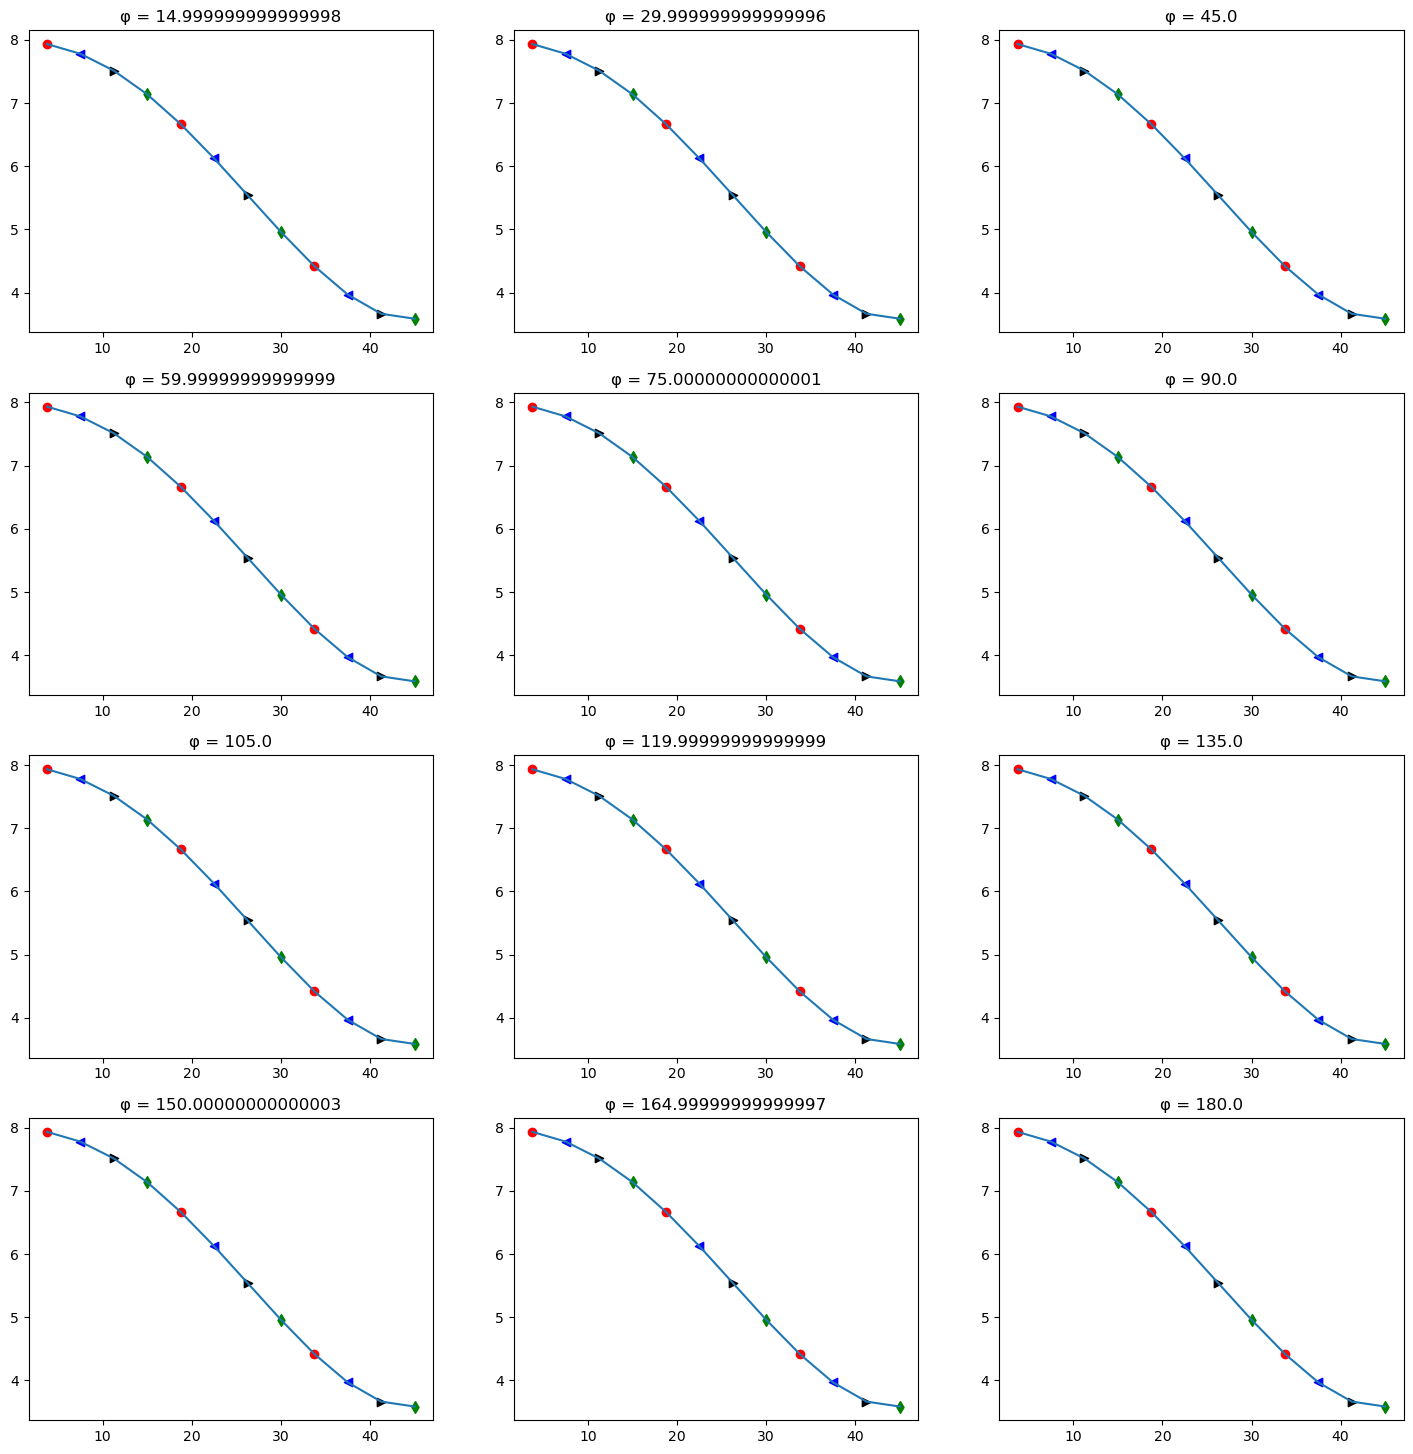

In [123]:
data_N = [a for a in Cr_S]
xa     = [a/4 for a in phi_m]

a = len(phi)//3
b = len(phi)//a
fig, axs = pl.subplots(a,b, figsize=(10,10))
count = 0
for i in range(a):
    for j in range(b):
        axs[i,j].scatter(xa[::4], data_N[count][::4], color='red', label='O')
        axs[i,j].scatter(xa[1::4], data_N[count][1::4], color='blue', marker='<', label='H')
        axs[i,j].scatter(xa[2::4], data_N[count][2::4], color='black', marker='>', label='P')
        axs[i,j].scatter(xa[3::4], data_N[count][3::4], color='green', marker='d', label='H')
        axs[i,j].plot(xa, data_N[count])
        axs[i,j].set_title("φ = " + str(phi[count]*180/np.pi))
        count += 1
        pl.subplots_adjust(top=1.5, right=1.5)
pl.show()

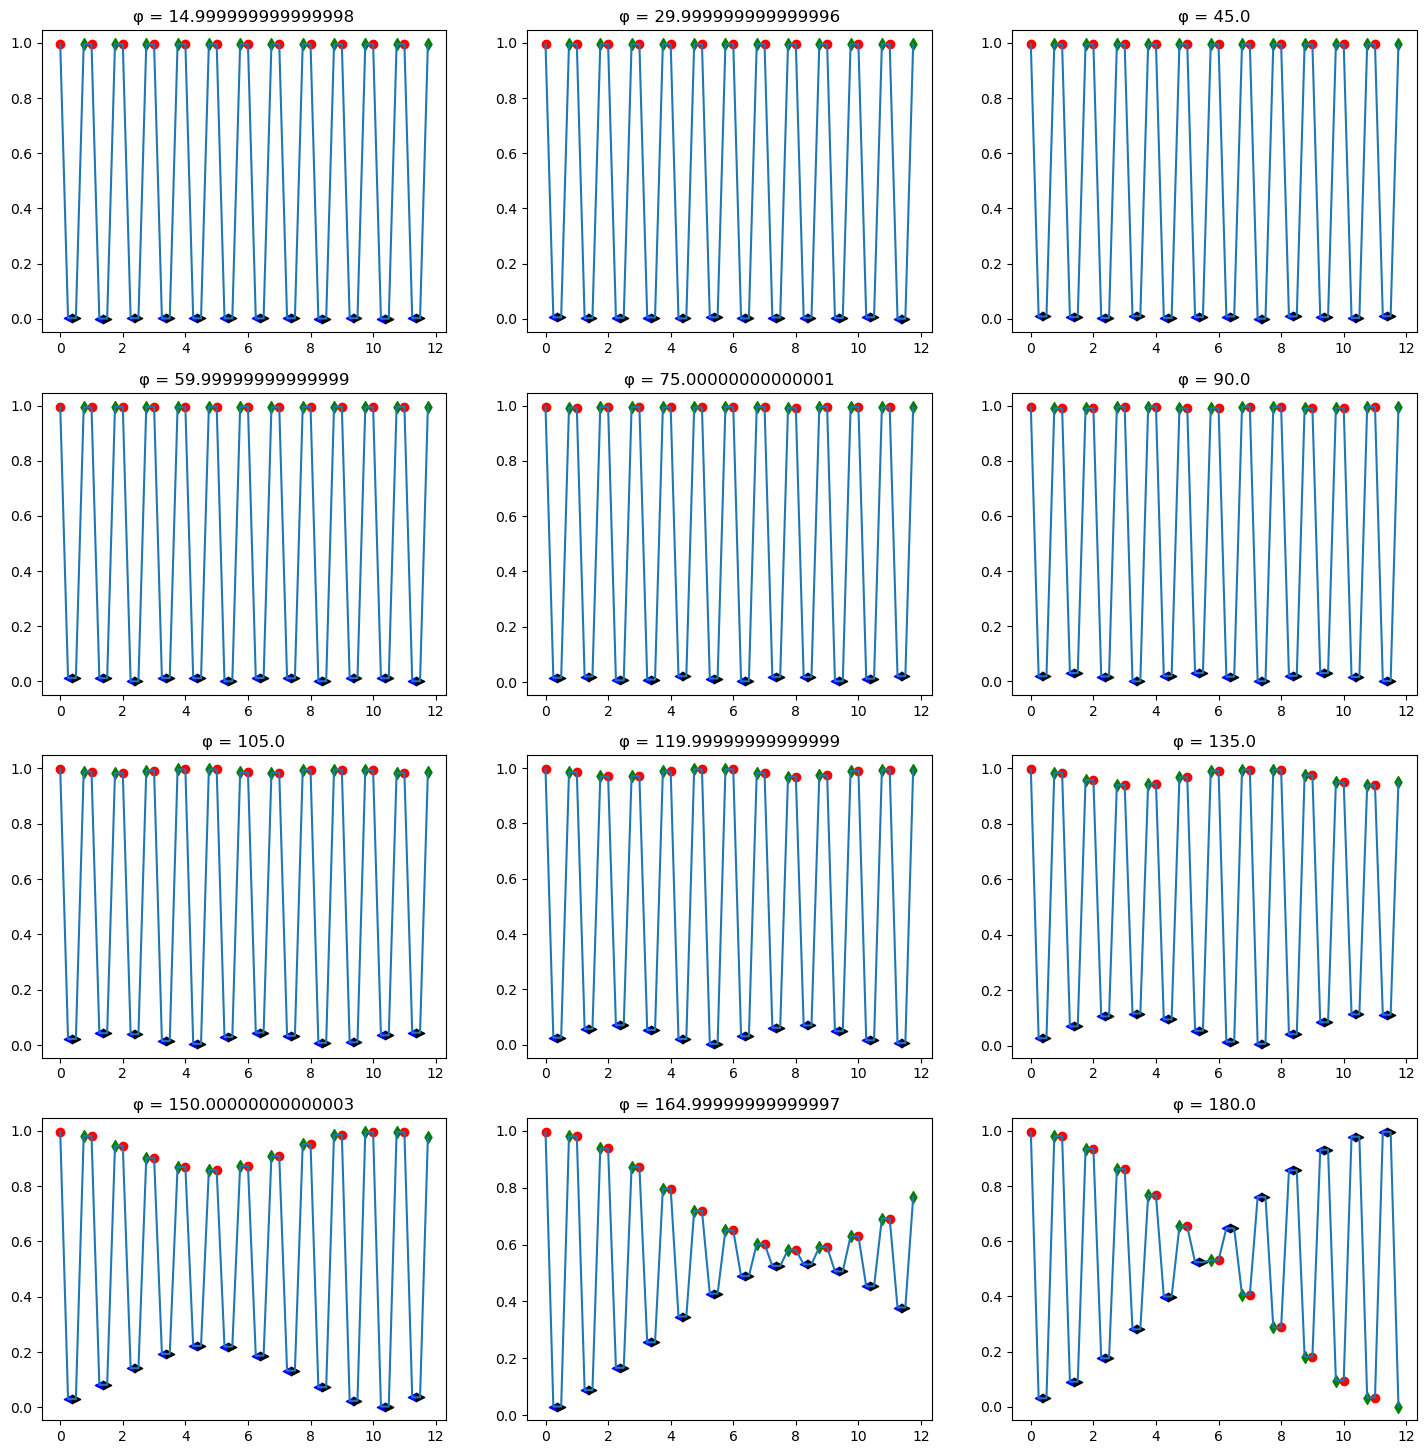

In [20]:
data_N = [a/N for a in data]
xa     = [a/4 for a in x_axis]

a = len(phi)//3
b = len(phi)//a
fig, axs = pl.subplots(a,b, figsize=(10,10))
count = 0
for i in range(a):
    for j in range(b):
        axs[i,j].scatter(xa[::4], data_N[count][::4], color='red', label='O')
        axs[i,j].scatter(xa[1::4], data_N[count][1::4], color='blue', marker='<', label='H')
        axs[i,j].scatter(xa[2::4], data_N[count][2::4], color='black', marker='>', label='P')
        axs[i,j].scatter(xa[3::4], data_N[count][3::4], color='green', marker='d', label='H')
        axs[i,j].plot(xa, data_N[count])
        axs[i,j].set_title("φ = " + str(phi[count]*180/np.pi))
        count += 1
        pl.subplots_adjust(top=1.5, right=1.5)
pl.show()

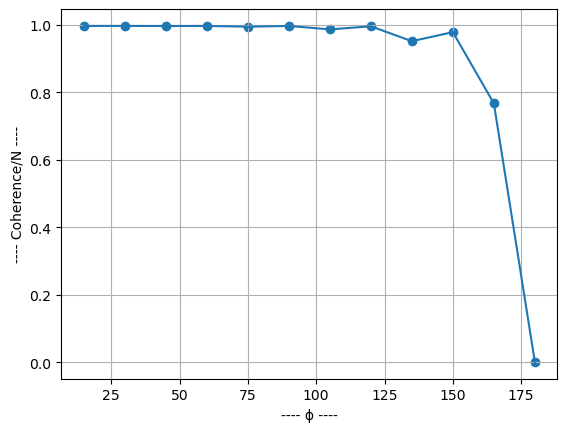

In [21]:
C = [a/N for a in Cr_ni]
pl.plot(phi_m,C)
pl.scatter(phi_m,C)
pl.xlabel("---- ϕ ----")
pl.ylabel("---- Coherence/N ----")
pl.grid(True)
pl.show()

In [22]:
print(Cr_ni)

[2.54999063e+02 2.54999820e+02 2.54927025e+02 2.54996153e+02
 2.54427370e+02 2.54966130e+02 2.52370333e+02 2.54712905e+02
 2.43415204e+02 2.50273862e+02 1.96215774e+02 2.45860845e-01]


In [23]:
print(C)

[0.9960900913336175, 0.9960930466318259, 0.9958086916461709, 0.9960787243110902, 0.9938569140255592, 0.9959614462321881, 0.9858216140814102, 0.994972286746317, 0.9508406420254839, 0.9776322719841585, 0.7664678660162597, 0.0009603939266688868]


[0.003909908666397177, 0.003906953368202903, 0.004191308353829082, 0.003921275688909764, 0.006143085974440798, 0.004038553767795161, 0.014178385918589664, 0.005027713253661137, 0.049159357974516094, 0.022367728015841526, 0.23353213398375383, 0.9990396060733329]


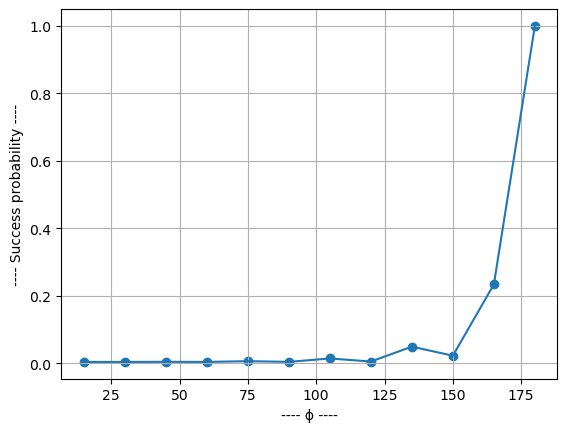

In [10]:
P_k = [1-a for a in C]
print(P_k)
pl.plot(phi_m,P_k)
pl.scatter(phi_m,P_k)
pl.xlabel("---- ϕ ----")
pl.ylabel("---- Success probability ----")
pl.grid(True)
pl.show()